In [1]:
import sys
import os
import yaml
import numpy as np
import pandas
import pathlib
import time
from datetime import date
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
from matplotlib.ticker import MaxNLocator
import matplotlib as mpl

In [2]:
in_dir = pathlib.Path('/mmfs1/gscratch/ssmc/USRS/PSI/Rachael/projects/KingCounty/spreadsheets')
# no3_f = in_dir/'NO3NO2_load_timeseries.xlsx'
# nh4_f = in_dir/'NH4_load_timeseries.xlsx'

In [3]:
# nh4={}
# no3={}
# for run in ['ssm_pnt_wq_exist', 'ssm_pnt_wq_1b','ssm_pnt_wq_1d','ssm_pnt_wq_1e','ssm_pnt_wq_1c','ssm_pnt_wq_2a']:
#     nh4[run] = pandas.read_excel(nh4_f, sheet_name=run).sum().sum()
#     no3[run] = pandas.read_excel(no3_f, sheet_name=run).sum().sum()

In [4]:
# total_nitrogen={}
# percent_nitrogen={}
# for run in [*nh4]:
#     total_nitrogen[run] = nh4[run]+no3[run]
#     percent_nitrogen[run]=total_nitrogen[run]/total_nitrogen['ssm_pnt_wq_exist']
#     print(run, total_nitrogen[run],percent_nitrogen[run])

#### These numbers don't seem right.  2a is supposed to have more nitrogren than 2014.  Trying a different approach. 

# Use [Municapal mode run](https://uwnetid.sharepoint.com/:x:/r/sites/og_uwt_psi/_layouts/15/Doc.aspx?sourcedoc=%7B417ABADA-C061-4340-9D09-2A23A26727E6%7D&file=Municipal%20%20model%20runs%20and%20scripting%20task%20list.xlsx&action=default&mobileredirect=true) spreadsheet

In [3]:
nh4 = pandas.read_excel(in_dir/'MunicipalOneDrive.xlsx',sheet_name='10_run_NH4',index_col='Unnamed: 1')
nh4.pop('Unnamed: 0')
no3 = pandas.read_excel(in_dir/'MunicipalOneDrive.xlsx',sheet_name='9_run_NO3NO2',index_col='Unnamed: 1')
no3.pop('Unnamed: 0')

  Agate East         0
  Agate West         1
  Anderson east      2
  Anderson west      3
  Artondale          4
                  ... 
  Clover Point     254
  Gulf Islands     255
  Macaulay         256
  Saanich          257
  Cushman No 2     258
Name: Unnamed: 0, Length: 259, dtype: int64

In [6]:
total_nitrogen={}
percent_nitrogen={}
for run in [*nh4]:
    total_nitrogen[run] = nh4[run].sum()+no3[run].sum()
    percent_nitrogen[run]=total_nitrogen[run]/total_nitrogen['1a']
    print(run, total_nitrogen[run],percent_nitrogen[run])
percent_nitrogen.pop('2a')
#percent_nitrogen.pop('3l')
percent_nitrogen

1a 51748970.95235593 1.0
1b 51256972.23903628 0.9904925894319208
1c 49338346.494279265 0.9534169585653004
1d 51637641.97061068 0.9978486725494938
1e 51368301.22078153 0.992643916882427
2a 49338346.494279265 0.9534169585653004
2b 54159595.41043259 1.0465830414346997
3a 51748970.95235593 1.0
3b 50536639.02082497 0.976572830160292
3c 45359842.210987315 0.8765361199694012
3e 51711117.478750095 0.9992685173654818
3f 51310140.553234145 0.991520016899934
3g 51013186.90394761 0.9857816680241672
3h 51384372.39724105 0.9929544771923956
3i 51377785.45906249 0.9928271908317716
3l 45359842.210987315 0.8765361199694012
3m 58138099.69372454 1.1234638800305987


{'1a': 1.0,
 '1b': 0.9904925894319208,
 '1c': 0.9534169585653004,
 '1d': 0.9978486725494938,
 '1e': 0.992643916882427,
 '2b': 1.0465830414346997,
 '3a': 1.0,
 '3b': 0.976572830160292,
 '3c': 0.8765361199694012,
 '3e': 0.9992685173654818,
 '3f': 0.991520016899934,
 '3g': 0.9857816680241672,
 '3h': 0.9929544771923956,
 '3i': 0.9928271908317716,
 '3m': 1.1234638800305987}

# Plots by region 

In [7]:
# for region in ['SOG_Bellingham','Whidbey']:
#     if region=='SOG_Bellingham':
#         tag = 'SOG_NB'
#         baseline = 'Present Day'
#     else:
#         tag = 'whidbey'
#         baseline='2014 conditions'
        
#     input_nc = pandas.read_excel(f'/mmfs1/gscratch/ssmc/USRS/PSI/Rachael/projects/KingCounty/data/{tag}/spreadsheets/{tag}_wc_noncompliant_m0p25.xlsx',
#            sheet_name='Volume_Days',
#           index_col="Unnamed: 0")
#     if region=='SOG_Bellingham':
#         input_nc.pop('2a')
#     vd_norm={}
#     for run in [*input_nc]:
#         vd_norm[run] = input_nc[run][region]/input_nc[baseline][region]
#     vd_norm['1a']=vd_norm[baseline]
#     vd_norm.pop(baseline)
    
#     vd_plot=np.zeros(len([*vd_norm]))
#     N_plot=np.zeros(len([*vd_norm]))

#     # use run names as keys to get normalized nitrogen loading and volume days
#     for idx,run in enumerate([*vd_norm]):
#         print(run)
#         vd_plot[idx]=vd_norm[run]
#         N_plot[idx]=percent_nitrogen[run]
#     vd_plot

# Original code

In [8]:
region = 'SOG_Bellingham' # 'ALL_REGIONS' # 

sog_nc = pandas.read_excel('/mmfs1/gscratch/ssmc/USRS/PSI/Rachael/projects/KingCounty/data/SOG_NB/spreadsheets/SOG_NB_wc_noncompliant_m0p25.xlsx',
                           sheet_name='Volume_Days',
                          index_col="Unnamed: 0")
sog_nc.pop('2a')
sog_vd_norm={}
for run in [*sog_nc]:
    sog_vd_norm[run] = sog_nc[run][region]/sog_nc['Present Day'][region]

In [9]:
sog_vd_norm['1a']=sog_vd_norm['Present Day']
sog_vd_norm.pop('Present Day')

1.0

In [10]:
sog_vd_norm

{'1b': 0.31870028135731887,
 '1c': 0.0,
 '1d': 0.988534587568061,
 '1e': 0.333329403922065,
 '2b': 7.6199563153113665,
 '1a': 1.0}

# create arrays of SOG_NB values

In [11]:
sog_vd_plot=np.zeros(len([*sog_vd_norm]))
sog_N_plot=np.zeros(len([*sog_vd_norm]))

# use run names as keys to get normalized nitrogen loading and volume days
for idx,run in enumerate([*sog_vd_norm]):
    print(run)
    sog_vd_plot[idx]=sog_vd_norm[run]
    sog_N_plot[idx]=percent_nitrogen[run]
sog_vd_plot

1b
1c
1d
1e
2b
1a


array([0.31870028, 0.        , 0.98853459, 0.3333294 , 7.61995632,
       1.        ])

### initialize arrays that combine both SOG and whidbey

In [12]:
volume_days=np.zeros(15)#len([*whidbey_vd_norm])+len([*sog_vd_norm]))
nitrogen=np.zeros(15)#len([*whidbey_vd_norm])+len([*sog_vd_norm]))
# use run names as keys to get normalized nitrogen loading and volume days
for idx,run in enumerate([*sog_vd_norm]):
    print(run)
    volume_days[idx]=sog_vd_norm[run]
    nitrogen[idx]=percent_nitrogen[run]

1b
1c
1d
1e
2b
1a


In [13]:
colors = ['purple','teal','purple','purple','teal','orange']
rivers = [False,True,False,False,True,False]
wwtp = [True,False,True,True,False,False]
base = [False,False,False,False,False,True]
rivers_2014 = [False,True,False,False,True,True]
wwtp_2014 = [True,False,True,True,False,True]

## print line fit values for river runs

In [14]:
s_poly={}
s_poly['rivers']=np.poly1d(np.polyfit(sog_N_plot[rivers_2014], sog_vd_plot[rivers_2014], 1))

## print line fit values for wwtp runs

In [15]:
s_poly['wwtp']=np.poly1d(np.polyfit(sog_N_plot[wwtp_2014], sog_vd_plot[wwtp_2014], 1))

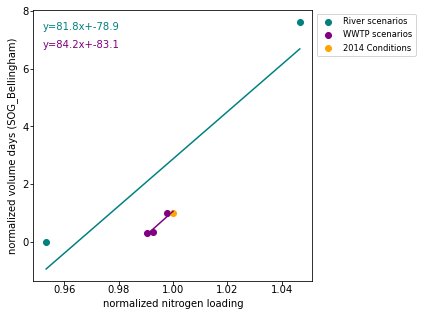

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5),
       gridspec_kw={
           'width_ratios': [1],
           'height_ratios': [1],
       'wspace': 0.25,
       'hspace': 0.15})

ax.scatter(sog_N_plot[rivers],sog_vd_plot[rivers],color='teal',label='River scenarios')
ax.scatter(sog_N_plot[wwtp],sog_vd_plot[wwtp],color='purple',label='WWTP scenarios')
ax.scatter(sog_N_plot[base],sog_vd_plot[base],color='orange',label='2014 Conditions')
plt.plot(np.unique(sog_N_plot[rivers_2014]), np.poly1d(np.polyfit(sog_N_plot[rivers_2014], sog_vd_plot[rivers_2014], 1))(np.unique(sog_N_plot[rivers_2014])), color='teal')
plt.plot(np.unique(sog_N_plot[wwtp_2014]), np.poly1d(np.polyfit(sog_N_plot[wwtp_2014], sog_vd_plot[wwtp_2014], 1))(np.unique(sog_N_plot[wwtp_2014])), color='purple')

fig.text(.15,0.825,f"y={s_poly['rivers'][1]:2.1f}x+{s_poly['rivers'][0]:2.1f}",color='teal')
fig.text(.15,0.775,f"y={s_poly['wwtp'][1]:2.1f}x+{s_poly['wwtp'][0]:2.1f}",color='purple')

ax.legend(bbox_to_anchor=(1,1),loc='upper left')
ax.set_xlabel('normalized nitrogen loading')
if region == "ALL_REGIONS":
    ax.set_ylabel(f'normalized volume days (across all regions)')
else:
    ax.set_ylabel(f'normalized volume days ({region})')
plt.savefig(f'/mmfs1/gscratch/ssmc/USRS/PSI/Rachael/projects/KingCounty/graphics/line_fits/sog_nitrogen_volumedays_fit_{region}.png', bbox_inches='tight', format='png', dpi=1000)

## print line fit values for river runs

In [24]:
s_poly={}
s_poly['rivers']=np.poly1d(np.polyfit(sog_N_plot[rivers_2014], sog_vd_plot[rivers_2014], 1))

## print line fit values for wwtp runs

In [25]:
s_poly['wwtp']=np.poly1d(np.polyfit(sog_N_plot[wwtp_2014], sog_vd_plot[wwtp_2014], 1))